## Heavy Traffic Indicators on I-94
### This project is about identifying patterns in traffic data of I-94
### My goal is to do just that

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

traffic_pre = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')
traffic = traffic_pre.copy()

In [219]:
# getting started
print('Head and Tail Exam:', '\n', '\n', traffic.head(5), '\n', '\n', traffic.tail(5))
print('Info Outline:', traffic.info())
print(traffic.describe())

Head and Tail Exam: 
 
   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918   
 
       holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None 

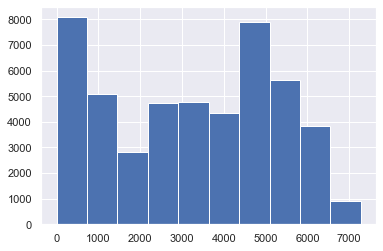

In [220]:
# data analysis

plt.hist(traffic['traffic_volume']) 
plt.show()

Traffic volume is pretty evenly spread between min and 75th percentile and then jumps considerably. Intuitively, there is probably a difference between volumes captured in day or night. 

To investigate this further, we are going to separate the data between daytime and nighttime. We will use the datetime module to analyize the date_time column. We know we are using the 24-hr system.

Daytime data: hours from 0700 to 1900 (12 hours)
Nighttime data: hours from 1900 to 0700 (12 hours)

In [221]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

traffic['hour'] = traffic['date_time'].dt.hour

print(traffic['hour'].head())

0     9
1    10
2    11
3    12
4    13
Name: hour, dtype: int64


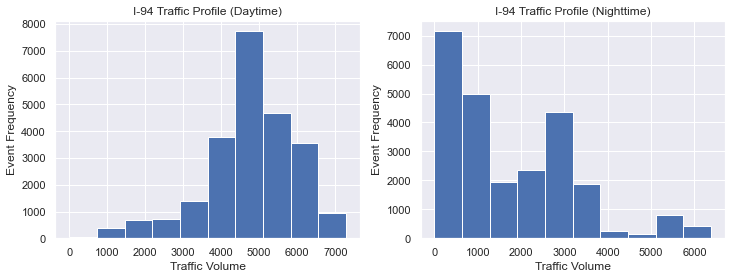

In [222]:
# daytime & nighttime analysis

daytime_split_bool = (traffic['hour'] >= 7) & (traffic['hour'] <= 18)
daytime_data = traffic[daytime_split_bool]
# print('Daytime Traffic Dataset:','\n', '\n', daytime_data.head(5),'\n')

night_split_bool = (traffic['hour'] >= 19) & (traffic['hour'] <= 24) | (traffic['hour'] >= 0) & (traffic['hour'] <= 6) 
nighttime_data = traffic[night_split_bool]
# print('Nighttime Traffic Dataset:', '\n', '\n', nighttime_data.head(5), '\n')

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(daytime_data['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Event Frequency')
plt.title('I-94 Traffic Profile (Daytime)')
plt.subplot(1,2,2)
plt.hist(nighttime_data['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Event Frequency')
plt.title('I-94 Traffic Profile (Nighttime)')
plt.show()

In [223]:
print('Daytime Traffic Dataset:','\n', '\n', daytime_data.describe())
print('\n', '\n')
print('Nighttime Traffic Dataset:','\n', '\n', nighttime_data.describe())

Daytime Traffic Dataset: 
 
                temp      rain_1h       snow_1h    clouds_all  traffic_volume  \
count  23877.000000  23877.00000  23877.000000  23877.000000    23877.000000   
mean     282.257596      0.53306      0.000253     53.122000     4762.047452   
std       13.298885     63.62932      0.008853     37.564588     1174.546482   
min        0.000000      0.00000      0.000000      0.000000        0.000000   
25%      272.680000      0.00000      0.000000      5.000000     4252.000000   
50%      283.780000      0.00000      0.000000     75.000000     4820.000000   
75%      293.440000      0.00000      0.000000     90.000000     5559.000000   
max      310.070000   9831.30000      0.510000    100.000000     7280.000000   

               hour  
count  23877.000000  
mean      12.431419  
std        3.473405  
min        7.000000  
25%        9.000000  
50%       12.000000  
75%       15.000000  
max       18.000000  

 

Nighttime Traffic Dataset: 
 
                te

The traffic volume is skewed to the right for the Daytime I-94 Traffic Profile, which means there is a trend of more activity in the daytime, as suspected.

The traffic volume is skewed to the left for the Nighttime I-94 Traffic Profile, which means there is a trend of less activity in the nighttime, as suspected.

We can drop the nighttime traffic data as we continue our analysis.

             temp   rain_1h   snow_1h  clouds_all  traffic_volume       hour  \
month                                                                          
1      265.483409  0.015080  0.000631   58.554108     4495.613727  12.386774   
2      266.663789  0.004019  0.000000   51.550459     4711.198394  12.351491   
3      273.619940  0.015839  0.000000   56.827811     4889.409560  12.363933   
4      279.661071  0.105343  0.000000   59.221525     4906.894305  12.492278   
5      289.282668  0.130863  0.000000   56.548825     4911.121609  12.478300   
6      294.576068  0.271121  0.000000   48.612374     4898.019566  12.425701   
7      296.785052  4.412258  0.000000   42.176619     4595.035744  12.388141   
8      295.119191  0.228113  0.000000   42.556892     4928.302035  12.387604   
9      292.520287  0.289807  0.000000   45.184112     4870.783145  12.401503   
10     284.081011  0.016065  0.000000   53.497990     4921.234922  12.546812   
11     276.698007  0.006200  0.000000   

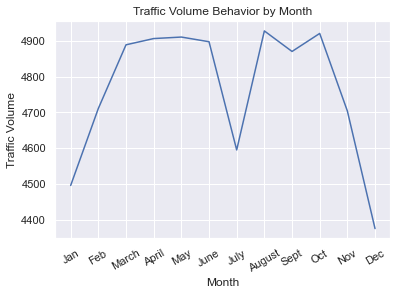

In [224]:
traffic['month'] = traffic['date_time'].dt.month
daytime_data = traffic[daytime_split_bool]
by_month = daytime_data.groupby('month').mean()
by_month['month'] = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec']
print(by_month)

plt.plot(by_month['month'], by_month['traffic_volume'])
plt.title('Traffic Volume Behavior by Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=30)
plt.show()

There is a sharp incrase in traffic volume between January and February and between July and August. Traffic volume decreases rapidly between June to July and November to December, with the lowest volume in July. 

                 temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
dayofweek                                                               
0          282.262755  2.923823  0.000017   57.508053     4893.551286   
1          282.301770  0.129172  0.000194   52.333234     5189.004782   
2          282.198316  0.068099  0.001091   53.662119     5284.454282   
3          282.279115  0.172436  0.000148   53.993191     5311.303730   
4          282.181216  0.092828  0.000225   51.412200     5291.600829   
5          282.300646  0.107596  0.000094   50.446376     3927.249558   
6          282.280340  0.133170  0.000000   52.288699     3436.541789   

                hour     month        day  
dayofweek                                  
0          12.472732  6.401243     Monday  
1          12.369994  6.458757    Tuesday  
2          12.453411  6.619158  Wednesday  
3          12.459739  6.501184   Thursday  
4          12.454545  6.575067     Friday  
5          12.391573  6.498821   S

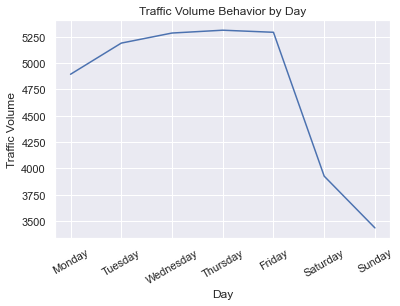

In [225]:
traffic['dayofweek'] = traffic['date_time'].dt.dayofweek
daytime_data = traffic[daytime_split_bool]
by_dayofweek = daytime_data.groupby('dayofweek').mean()
by_dayofweek['day'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(by_dayofweek)

plt.plot(by_dayofweek['day'], by_dayofweek['traffic_volume'])
plt.title('Traffic Volume Behavior by Day')
plt.xlabel('Day')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=30)
plt.show()

There is a steady increase in traffic volume between Monday and Friday with a sharp drop upon the weekend. As we continue our analysis, we will split the dataset between weekday and weekend values, as weekends have limited traffic activity in comparison to business days.

In [226]:
# print(traffic.head())
business_days_bool = (traffic['dayofweek'] >= 0) & (traffic['dayofweek'] <=5)
business_days = traffic[business_days_bool]
weekend_bool = traffic['dayofweek'] >= 6
weekend_days = traffic[weekend_bool]

by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend_days.groupby('hour').mean()

print(list(by_hour_business.index))

# print(by_hour_business['traffic_volume'])
# print(by_hour_weekend['traffic_volume'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


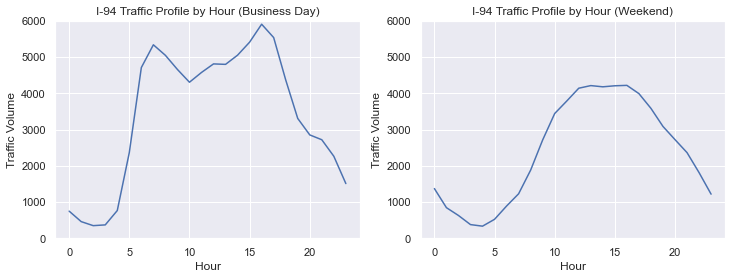

In [227]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(list(by_hour_business.index), by_hour_business['traffic_volume'])
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.ylim(0,6000)
plt.title('I-94 Traffic Profile by Hour (Business Day)')
plt.subplot(1,2,2)
plt.plot(list(by_hour_weekend.index), by_hour_weekend['traffic_volume'])
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.ylim(0,6000)
plt.title('I-94 Traffic Profile by Hour (Weekend)')
plt.show()

Business days experience peaks around 7AM and 4PM, while traffic hits a maximum from 12PM to 4PM on the weekends.

So far, we've focused on finding time indicators for heavy traffic. Another possible indicator of heavy traffic is weather. In the next section, we will find the correlation for traffic volume with different weather indicators: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

In [228]:
business_days.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']]

temp          0.120878
rain_1h       0.004798
snow_1h      -0.001377
clouds_all    0.067109
Name: traffic_volume, dtype: float64

There is a positive correlation between traffic volume and temperature, rain and clouds and a negative correlation with snowy conditions. The strongest correlation observed is with temperature. Below is a scatterplot of the findings.

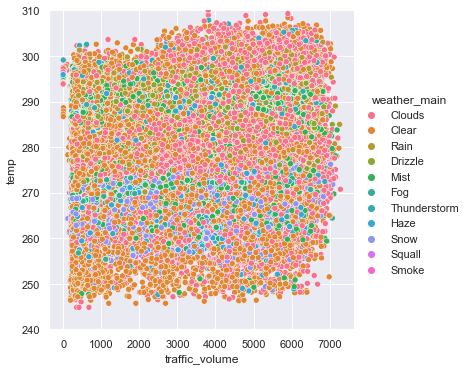

In [232]:
# print(business_days.head(5))

scatter=sns.relplot(data=business_days,x='traffic_volume',y='temp',hue='weather_main')
scatter.set(ylim=(240, 310))

Not much of a correlation here.

The next thing we'll want to check is if there is a correlatino with the following string columns: weather_main, weather_description.

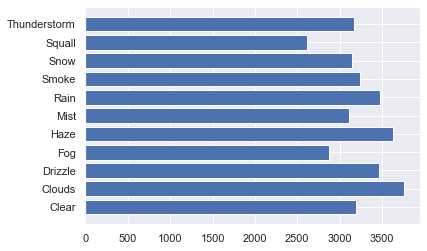

In [230]:
by_weather_main = business_days.groupby('weather_main').mean()
by_weather_description = business_days.groupby('weather_description').mean()

x_coord2 = by_weather_main.index
y_coord2 = by_weather_main['traffic_volume']
plt.barh(y=x_coord2, width = y_coord2)
plt.show()

Traffic appears to be the highest when the weather is cloudy, hazy or raining and lowest when weather is in fog, mist or squall. Next we'll want to see how the data breaks down by weather description.

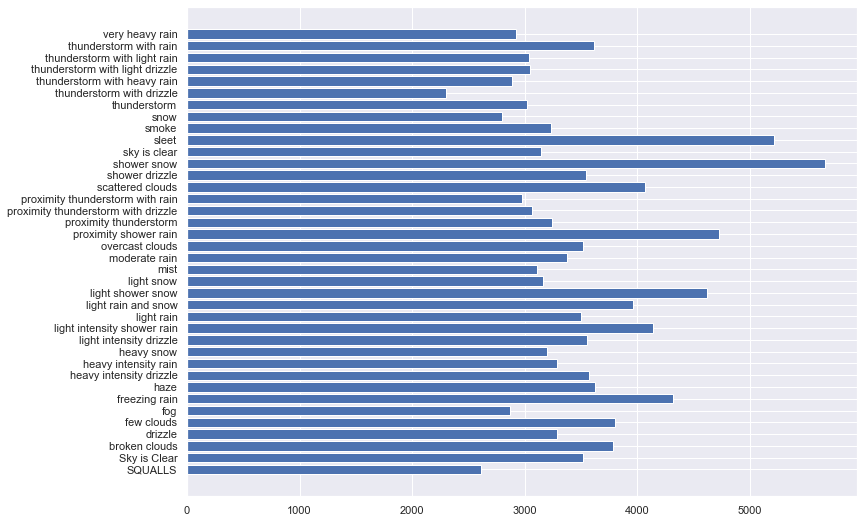

In [231]:
plt.figure(figsize=(12,9))
x_coord2 = by_weather_description.index
y_coord2 = by_weather_description['traffic_volume']
plt.barh(y=x_coord2, width = y_coord2)
plt.show()

Traffic volume appears to be highest when weaher is clear or sleet and lowest in case of thunderstorm or fog.

### Conclusion

In conclusion, heavy indicators include day of week and time of day, along with certain seasons of the year. As expected, traffic is highest when the weather is good and lowest in cases of low visibility.